In [1]:
import numpy as np
import cv2

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = 'data/train'
val_dir = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(120,120),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(120,120),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

Found 1800 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [3]:
models = Sequential()

models.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(120,120,3)))
models.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Dropout(0.25))

models.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Dropout(0.25))

models.add(Flatten())
models.add(Dense(1024, activation='relu'))
models.add(Dropout(0.5))
models.add(Dense(2, activation='softmax'))

In [4]:
from tensorflow.keras.optimizers import legacy

models.compile(loss='categorical_crossentropy',
              optimizer=legacy.Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

C:\Users\chipp\AppData\Roaming\Python\Python311\site-packages\keras\src\optimizers\legacy\adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#models.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])

models_info = models.fit_generator(
        train_generator,
        steps_per_epoch=1800 // 64,
        epochs=40,
        validation_data=validation_generator,
        validation_steps=1800 // 64)

C:\Users\chipp\AppData\Local\Temp\ipykernel_9716\2240895845.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  models_info = models.fit_generator(


Epoch 1/40


28/28 [==============================] - 81s 3s/step - loss: 0.6905 - accuracy: 0.5593 - val_loss: 0.6187 - val_accuracy: 0.7628
Epoch 2/40
28/28 [==============================] - 52s 2s/step - loss: 0.5213 - accuracy: 0.7736 - val_loss: 0.4471 - val_accuracy: 0.8164
Epoch 3/40
28/28 [==============================] - 53s 2s/step - loss: 0.4276 - accuracy: 0.8001 - val_loss: 0.4205 - val_accuracy: 0.8281
Epoch 4/40
28/28 [==============================] - 52s 2s/step - loss: 0.4178 - accuracy: 0.8105 - val_loss: 0.4147 - val_accuracy: 0.8315
Epoch 5/40
28/28 [==============================] - 55s 2s/step - loss: 0.3858 - accuracy: 0.8289 - val_loss: 0.3999 - val_accuracy: 0.8175
Epoch 6/40
28/28 [==============================] - 54s 2s/step - loss: 0.3790 - accuracy: 0.8318 - val_loss: 0.3766 - val_accuracy: 0.8438
Epoch 7/40
28/28 [==============================] - 52s 2s/step - loss: 0.3608 - accuracy: 0.8410 - val_loss: 0.4200 - val_accuracy: 0.7991
Epoch 8/40
28/28 [

In [9]:
models.save_weights('dum_model.h5')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

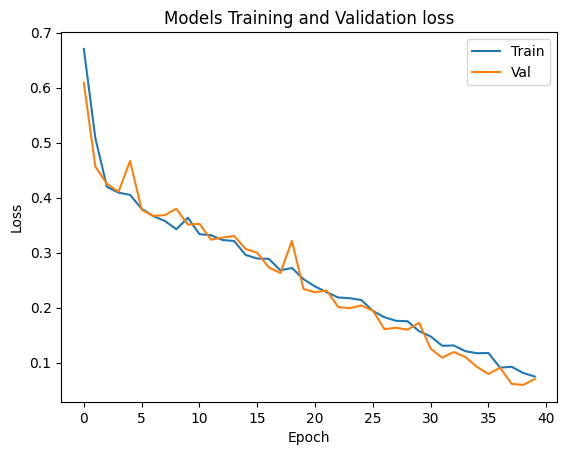

In [11]:
plt.plot(models_info.history['loss'])
plt.plot(models_info.history['val_loss'])
plt.title('Models Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

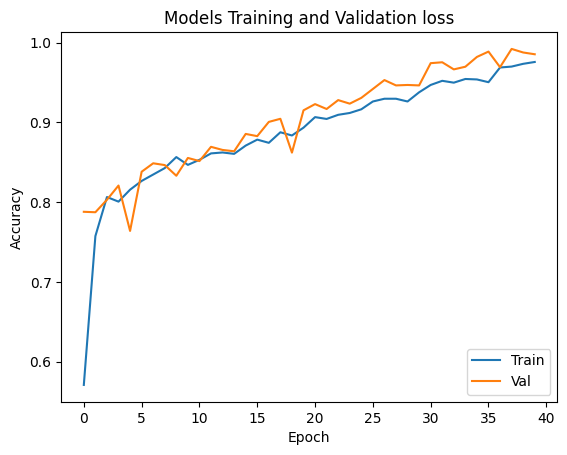

In [12]:
plt.plot(models_info.history['accuracy'])
plt.plot(models_info.history['val_accuracy'])
plt.title('Models Training and Validation loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [13]:
# Assuming 'models_info.history' contains accuracy and validation accuracy
accuracy = models_info.history['accuracy'][-1]  # Get the final training accuracy
val_accuracy = models_info.history['val_accuracy'][-1]  # Get the final validation accuracy

print("Training accuracy:", accuracy)
print("Validation accuracy:", val_accuracy)

Training accuracy: 0.975806474685669
Validation accuracy: 0.9854910969734192
